In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from statistics import mode
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
df = pd.read_csv('preply.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df


,price,lessons,rating,popular,newly_joined,has_diploma,approved_matirials,reviews,students_count,English,...,Russian,Turkish,Portuguese,German,Danish,Hebrew,French,teaches_count,last_booked,response_time
0,60,264,5.0,0,0,0,0,10,19,7,...,0,0,0,0,0,0,0,1,4,1.0
1,110,1724,5.0,0,0,0,1,25,28,7,...,0,0,0,0,0,0,0,1,1,1.0
2,126,663,5.0,1,0,1,0,19,32,7,...,0,0,0,0,0,0,0,1,5,7.0
3,28,3,0.0,1,1,1,0,0,5,7,...,0,0,0,2,0,0,0,1,2,24.0
4,28,2,0.0,3,1,1,0,0,9,7,...,0,0,0,0,0,0,0,1,15,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,22,3,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,0,1,0,NaN
4013,47,2,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,0,1,0,NaN
4014,28,0,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,0,1,0,NaN
4015,28,0,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,0,1,0,NaN


#### general information about our data frame

In [3]:
df.describe()

,price,lessons,rating,popular,newly_joined,has_diploma,approved_matirials,reviews,students_count,English,...,Russian,Turkish,Portuguese,German,Danish,Hebrew,French,teaches_count,last_booked,response_time
count,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,...,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,4017.000000,1970.000000
mean,50.425442,529.424197,3.371745,0.186706,0.310929,0.354742,0.077670,8.834951,11.246453,6.646502,...,0.616380,0.190441,0.253921,0.294996,0.006970,0.021409,0.599203,1.110281,2.142395,5.177157
std,29.939281,1127.247924,2.284319,0.578923,0.462931,0.478495,0.267685,18.798083,15.484811,0.635526,...,1.876931,1.056345,1.181384,1.105427,0.157645,0.309285,1.615623,0.621684,3.905716,6.235971
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,31.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,47.000000,116.000000,4.900000,0.000000,0.000000,0.000000,0.000000,3.000000,5.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,62.000000,529.000000,5.000000,0.000000,1.000000,1.000000,0.000000,9.000000,16.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,6.000000
max,315.000000,16307.000000,5.000000,3.000000,1.000000,1.000000,1.000000,314.000000,180.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,13.000000,52.000000,24.000000


## Pearson correlation coefficient

### general information about pearson:
#### -is a measure of linear correlation between two sets of data.
#### -It is the ratio between the covariance of two variables and the product of their standard deviations.
#### -a normalised measurement of the covariance, such that the result always has a value between −1 and 1. 

## purpose of using it (on our words..):

#### it helps us see strong connections between the feature that represnted by the columns.
#### the closer the coefficient to 1 - the stronger the connection between the variables
### those two will help us later make a better model that will give us the best result.



In [4]:
df.corr()

,price,lessons,rating,popular,newly_joined,has_diploma,approved_matirials,reviews,students_count,English,...,Russian,Turkish,Portuguese,German,Danish,Hebrew,French,teaches_count,last_booked,response_time
price,1.000000,0.121377,0.043496,-0.101700,-0.040394,0.079290,0.035863,0.104028,0.016645,0.178256,...,0.041496,-0.043102,0.059080,0.137330,0.011506,0.048711,0.101690,0.124410,-0.116577,0.010869
lessons,0.121377,1.000000,0.300478,0.082896,-0.306855,0.024848,0.222878,0.826492,0.673780,-0.036010,...,0.136954,-0.010645,0.025835,0.056490,0.011378,0.007267,0.046943,0.242480,0.374132,-0.049495
rating,0.043496,0.300478,1.000000,0.107776,-0.991631,0.027921,0.188426,0.308827,0.438747,0.023289,...,0.108183,0.022724,0.032462,0.071066,0.008291,0.007130,0.061391,0.095721,0.300102,-0.149063
popular,-0.101700,0.082896,0.107776,1.000000,-0.107960,0.012533,-0.008440,0.104515,0.298881,0.052873,...,-0.055522,0.031829,0.008942,0.014689,-0.014263,-0.002860,0.021989,-0.002567,0.377089,-0.036128
newly_joined,-0.040394,-0.306855,-0.991631,-0.107960,1.000000,-0.022565,-0.186894,-0.315750,-0.441110,-0.024952,...,-0.107139,-0.020297,-0.031938,-0.067368,-0.009233,-0.006504,-0.065056,-0.104466,-0.302545,0.133512
has_diploma,0.079290,0.024848,0.027921,0.012533,-0.022565,1.000000,-0.005209,0.034997,0.021804,-0.001037,...,0.049257,0.025431,-0.004333,0.044548,-0.026186,0.005876,0.017115,0.000711,0.018798,-0.069504
approved_matirials,0.035863,0.222878,0.188426,-0.008440,-0.186894,-0.005209,1.000000,0.154169,0.220533,0.041410,...,-0.002136,-0.003009,0.018722,-0.001716,0.004870,-0.005052,0.018452,-0.035025,0.117791,-0.007644
reviews,0.104028,0.826492,0.308827,0.104515,-0.315750,0.034997,0.154169,1.000000,0.610033,-0.029855,...,0.130044,0.011189,0.025355,0.071209,0.005262,0.013071,0.066298,0.242178,0.325619,-0.090052
students_count,0.016645,0.673780,0.438747,0.298881,-0.441110,0.021804,0.220533,0.610033,1.000000,0.096554,...,-0.009289,0.002062,0.039278,0.044687,0.010925,0.001966,0.067590,0.088069,0.593302,-0.045068
English,0.178256,-0.036010,0.023289,0.052873,-0.024952,-0.001037,0.041410,-0.029855,0.096554,1.000000,...,-0.360873,-0.127806,-0.056524,-0.086875,-0.007710,-0.021028,-0.005610,-0.164744,0.031520,0.043263


# The Spearman coefficient (inclusion of Pearson correlation)
##### it fits for the case where at least one of the two variables is measured on an order scale, and the other variable can be measured on an order scale, gain or dose.

## purpose of using it:
### we wanted to see the conncetions between the variables, that calculated differently.


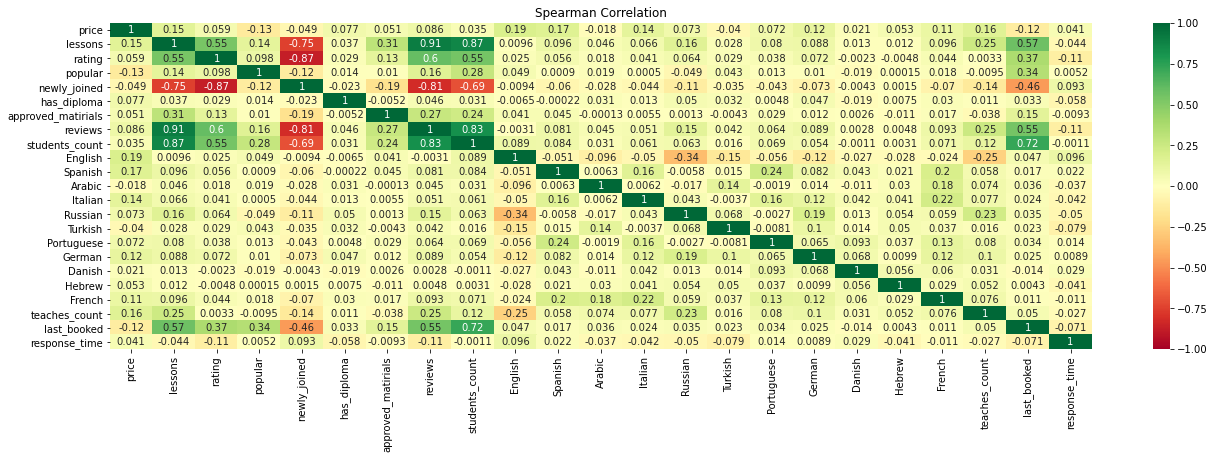

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

corr_spearman = df.corr(method='spearman')

fig = plt.figure(figsize = (22,6))
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', vmin = -1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

# Outliers:
## we will calculate the values of the outliers and get a better look of them by 3 different ways. the first of them will be 


# 1.Histogram


Text(0, 0.5, 'frequency')

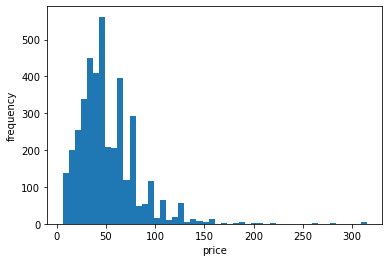

In [6]:
plt.hist(df.price,bins=50)
plt.xlabel("price")
plt.ylabel("frequency")


## As can be seen in the histogram, we saw on the first impression that starting from the price 120 - there are exceptional prices.

## we can see on the next code snippet the count of the exceptional prices (132)


In [7]:
sum(df.price>120)

132

# 2.Boxplot

## with the help of boxplot we can get a better and accurate picture of the values of the outliers.


C:\Users\Zohar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

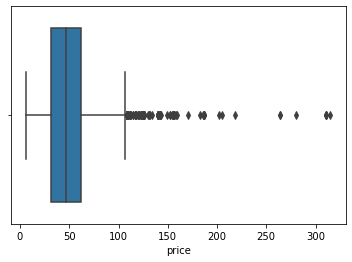

In [8]:
sns.boxplot(df.price)

### as can be seen our outliers are the HIGH prices per our and NOT the low ones.
### so we can make use of it- append another column calles "is_expensive" that gives us indication if the price is relatively high.
### but first we will try the last way to calculate the outliers and use the one that gave us the best impression.

#### we learned that from the 25th to the 75th percentile there are 50 percent of our data which is around the average results.
#### for us the rest will be exceptional and special treatment will be given to them.

# 3.IQR (Interquartile range)
### The IQR describes the middle 50% of values when ordered from lowest to highest.


In [9]:
Q1=np.percentile(df["price"],25)
Q3=np.percentile(df["price"],75)
IQR=Q3-Q1

price_outlier_rows=df[(df["price"]< Q1-1.5*IQR) | (df["price"] > Q3+1.5*IQR)].index
len(price_outlier_rows)

203

### we got 203 outliers by IQR calucte. (203 people that take an exceptional price per hour)

In [10]:
type(price_outlier_rows)

pandas.core.indexes.numeric.Int64Index

# STD
## now we will considered exceptional data in relation to the average (standard deviation)

In [11]:
z_score=(df["price"]-df["price"].mean()) / df["price"].std()
outliers= abs(z_score) > 3
sum(outliers)

44

## in conclusion, we showd three ways to calculate outliers:

### 1. histogram
### 2.boxplot
### 3.iqr
### 4.std

## we chose the boxplot calculation on adding a new column.

In [12]:
df.insert(23, 'is_expensive',0)

In [13]:
for i in range(len(price_outlier_rows)):
    df.iloc[price_outlier_rows[i],23]=1


In [14]:
df

,price,lessons,rating,popular,newly_joined,has_diploma,approved_matirials,reviews,students_count,English,...,Turkish,Portuguese,German,Danish,Hebrew,French,teaches_count,last_booked,response_time,is_expensive
0,60,264,5.0,0,0,0,0,10,19,7,...,0,0,0,0,0,0,1,4,1.0,0
1,110,1724,5.0,0,0,0,1,25,28,7,...,0,0,0,0,0,0,1,1,1.0,1
2,126,663,5.0,1,0,1,0,19,32,7,...,0,0,0,0,0,0,1,5,7.0,1
3,28,3,0.0,1,1,1,0,0,5,7,...,0,0,2,0,0,0,1,2,24.0,0
4,28,2,0.0,3,1,1,0,0,9,7,...,0,0,0,0,0,0,1,15,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,22,3,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,NaN,0
4013,47,2,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,NaN,0
4014,28,0,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,NaN,0
4015,28,0,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,NaN,0


# Missing data

## below you can see the treatment of the missing data (we inserted to those cells the mode value)
## mode- the mode of a set of values is the value that appears most often


In [15]:
commonResponseTime=mode(df['response_time'])
commonResponseTime

1.0

In [16]:
df['response_time']=df['response_time'].replace([np.nan],commonResponseTime)

In [17]:
df

,price,lessons,rating,popular,newly_joined,has_diploma,approved_matirials,reviews,students_count,English,...,Turkish,Portuguese,German,Danish,Hebrew,French,teaches_count,last_booked,response_time,is_expensive
0,60,264,5.0,0,0,0,0,10,19,7,...,0,0,0,0,0,0,1,4,1.0,0
1,110,1724,5.0,0,0,0,1,25,28,7,...,0,0,0,0,0,0,1,1,1.0,1
2,126,663,5.0,1,0,1,0,19,32,7,...,0,0,0,0,0,0,1,5,7.0,1
3,28,3,0.0,1,1,1,0,0,5,7,...,0,0,2,0,0,0,1,2,24.0,0
4,28,2,0.0,3,1,1,0,0,9,7,...,0,0,0,0,0,0,1,15,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,22,3,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,1.0,0
4013,47,2,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,1.0,0
4014,28,0,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,1.0,0
4015,28,0,0.0,0,1,0,0,0,0,7,...,0,0,0,0,0,0,1,0,1.0,0


### With the help of the "info()" command we can see that there is no missing information and all our columns are "int" or "float".

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               4017 non-null   int64  
 1   lessons             4017 non-null   int64  
 2   rating              4017 non-null   float64
 3   popular             4017 non-null   int64  
 4   newly_joined        4017 non-null   int64  
 5   has_diploma         4017 non-null   int64  
 6   approved_matirials  4017 non-null   int64  
 7   reviews             4017 non-null   int64  
 8   students_count      4017 non-null   int64  
 9   English             4017 non-null   int64  
 10  Spanish             4017 non-null   int64  
 11  Arabic              4017 non-null   int64  
 12  Italian             4017 non-null   int64  
 13  Russian             4017 non-null   int64  
 14  Turkish             4017 non-null   int64  
 15  Portuguese          4017 non-null   int64  
 16  German

## --------------------------------------------------------------------------------------------------------------------

In [36]:
df.to_csv('preply_final_final.csv',sep=',')